<a href="https://colab.research.google.com/github/purum01/python_seminar/blob/main/exam03_DA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

공공데이타 - https://www.data.go.kr/dataset/15012005/fileData.do

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 14 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

In [6]:
df = pd.read_csv("drive/MyDrive/test/상가업소정보_201912_01.csv", sep='|')
df.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,시도코드,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번부번지,지번주소,도로명코드,도로명,건물본번지,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19905471,와라와라호프,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,기타 주점업,11,서울특별시,11680,강남구,1168060000,대치1동,1168010600,대치동,1168010600206040000,1,대지,604,NaN,서울특별시 강남구 대치동 604,116802000003,서울특별시 강남구 남부순환로,2933,NaN,1168010600106040000014378,대치상가,서울특별시 강남구 남부순환로 2933,135280,6280.0,NaN,1,NaN,127.061026,37.493922
1,19911397,커피빈코리아선릉로93길점,코리아선릉로93길점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,비알콜 음료점업,11,서울특별시,11680,강남구,1168064000,역삼1동,1168010100,역삼동,1168010100206960042,1,대지,696,42.0,서울특별시 강남구 역삼동 696-42,116804166502,서울특별시 강남구 선릉로93길,6,NaN,1168010100106960042022041,NaN,서울특별시 강남구 선릉로93길 6,135080,6149.0,NaN,1,NaN,127.047883,37.505675
2,19911801,프로포즈,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,기타 주점업,11,서울특별시,11545,금천구,1154563000,독산3동,1154510200,독산동,1154510200201620001,1,대지,162,1.0,서울특별시 금천구 독산동 162-1,115453117003,서울특별시 금천구 가산로,34,6.0,1154510200101620001017748,NaN,서울특별시 금천구 가산로 34-6,153010,8545.0,NaN,1,NaN,126.899220,37.471711
3,19912201,싱싱커피&토스트,NaN,Q,음식,Q07,패스트푸드,Q07A10,토스트전문,I56192,"피자, 햄버거, 샌드위치 및 유사 음식점업",26,부산광역시,26530,사상구,2653062000,괘법동,2653010400,괘법동,2653010400205780000,1,대지,578,NaN,부산광역시 사상구 괘법동 578,265303139004,부산광역시 사상구 괘감로,37,NaN,2653010400105780000002037,산업용품유통상가,부산광역시 사상구 괘감로 37,617726,46977.0,NaN,1,26,128.980455,35.159774
4,19932756,가락사우나내스낵,NaN,F,생활서비스,F09,대중목욕탕/휴게,F09A02,사우나/증기탕/온천,S96121,욕탕업,11,서울특별시,11710,송파구,1171060000,석촌동,1171010500,석촌동,1171010500202560000,1,대지,256,NaN,서울특별시 송파구 석촌동 256,117103123001,서울특별시 송파구 가락로,71,NaN,1171010500102560005010490,NaN,서울특별시 송파구 가락로 71,138846,5690.0,NaN,1,NaN,127.104071,37.500249


In [7]:
df.shape

(573680, 39)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573680 entries, 0 to 573679
Data columns (total 39 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     573680 non-null  int64  
 1   상호명        573679 non-null  object 
 2   지점명        76674 non-null   object 
 3   상권업종대분류코드  573680 non-null  object 
 4   상권업종대분류명   573680 non-null  object 
 5   상권업종중분류코드  573680 non-null  object 
 6   상권업종중분류명   573680 non-null  object 
 7   상권업종소분류코드  573680 non-null  object 
 8   상권업종소분류명   573680 non-null  object 
 9   표준산업분류코드   539290 non-null  object 
 10  표준산업분류명    539290 non-null  object 
 11  시도코드       573680 non-null  int64  
 12  시도명        573680 non-null  object 
 13  시군구코드      573680 non-null  int64  
 14  시군구명       573680 non-null  object 
 15  행정동코드      573680 non-null  int64  
 16  행정동명       573680 non-null  object 
 17  법정동코드      573680 non-null  int64  
 18  법정동명       573680 non-null  object 
 19  지번코드       573680 non-n

In [9]:
# 컬럼 정리
columns = ['상호명', '상권업종대분류명', '상권업종중분류명', '상권업종소분류명', 
           '시도명', '시군구명', '행정동명', '법정동명', '도로명주소', 
           '경도', '위도']
df = df[columns].copy()
df.shape

(573680, 11)

In [10]:
# 시도명이 서울로 시작하는 데이터만 보기

df_seoul = df[df["시도명"] == "서울특별시"].copy()
print(df_seoul.shape)
df_seoul.head()

(407376, 11)


,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도
0,와라와라호프,음식,유흥주점,호프/맥주,서울특별시,강남구,대치1동,대치동,서울특별시 강남구 남부순환로 2933,127.061026,37.493922
1,커피빈코리아선릉로93길점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강남구,역삼1동,역삼동,서울특별시 강남구 선릉로93길 6,127.047883,37.505675
2,프로포즈,음식,유흥주점,호프/맥주,서울특별시,금천구,독산3동,독산동,서울특별시 금천구 가산로 34-6,126.899220,37.471711
4,가락사우나내스낵,생활서비스,대중목욕탕/휴게,사우나/증기탕/온천,서울특별시,송파구,석촌동,석촌동,서울특별시 송파구 가락로 71,127.104071,37.500249
5,초밥왕,음식,일식/수산물,음식점-초밥전문,서울특별시,송파구,잠실6동,신천동,서울특별시 송파구 올림픽로 293-19,127.102490,37.515149


In [11]:
df_seoul["시군구명"].unique()

array(['강남구', '금천구', '송파구', '광진구', '강서구', '중구', '서초구', '성북구', '구로구',
       '영등포구', '서대문구', '동대문구', '노원구', '동작구', '성동구', '관악구', '강동구', '양천구',
       '종로구', '강북구', '은평구', '중랑구', '도봉구', '마포구', '용산구'], dtype=object)

In [12]:
# "seoul_open_store.csv" 라는 이름으로 저장합니다.
df_seoul.to_csv("seoul_open_store.csv", index=False)

In [13]:
df_seoul["상호명_소문자"] = df_seoul["상호명"].str.lower()
df_31 = df_seoul[df_seoul["상호명_소문자"].str.contains('배스킨라빈스|베스킨라빈스|baskinrobbins|던킨|dunkin')].copy()
df_31.head()

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도,상호명_소문자
76,배스킨라빈스,음식,패스트푸드,아이스크림판매,서울특별시,관악구,청룡동,봉천동,서울특별시 관악구 관악로 161,126.952166,37.479599,배스킨라빈스
1167,던킨도너츠,음식,패스트푸드,도너츠전문,서울특별시,서대문구,신촌동,대현동,서울특별시 서대문구 이화여대길 56,126.945369,37.559263,던킨도너츠
1819,던킨도너츠테크노마트점,음식,패스트푸드,도너츠전문,서울특별시,광진구,구의3동,구의동,서울특별시 광진구 광나루로56길 85,127.095681,37.535713,던킨도너츠테크노마트점
2164,베스킨라빈스,음식,패스트푸드,아이스크림판매,서울특별시,마포구,서교동,서교동,서울특별시 마포구 와우산로 88,126.923809,37.552104,베스킨라빈스
2305,던킨도너츠창동하나로,음식,패스트푸드,도너츠전문,서울특별시,도봉구,창4동,창동,서울특별시 도봉구 마들로11길 20,127.050818,37.655101,던킨도너츠창동하나로


In [14]:
df_31.loc[df_31["상호명_소문자"].str.contains("배스킨라빈스|베스킨라빈스|baskinrobbins"), "브랜드명"] = "배스킨라빈스"
df_31[["상호명", "브랜드명"]].head()

,상호명,브랜드명
76,배스킨라빈스,배스킨라빈스
1167,던킨도너츠,NaN
1819,던킨도너츠테크노마트점,NaN
2164,베스킨라빈스,배스킨라빈스
2305,던킨도너츠창동하나로,NaN


In [15]:
df_31["브랜드명"] = df_31["브랜드명"].fillna("던킨도너츠")
df_31[["상호명", "브랜드명"]].head()

,상호명,브랜드명
76,배스킨라빈스,배스킨라빈스
1167,던킨도너츠,던킨도너츠
1819,던킨도너츠테크노마트점,던킨도너츠
2164,베스킨라빈스,배스킨라빈스
2305,던킨도너츠창동하나로,던킨도너츠


In [16]:
df_31

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도,상호명_소문자,브랜드명
76,배스킨라빈스,음식,패스트푸드,아이스크림판매,서울특별시,관악구,청룡동,봉천동,서울특별시 관악구 관악로 161,126.952166,37.479599,배스킨라빈스,배스킨라빈스
1167,던킨도너츠,음식,패스트푸드,도너츠전문,서울특별시,서대문구,신촌동,대현동,서울특별시 서대문구 이화여대길 56,126.945369,37.559263,던킨도너츠,던킨도너츠
1819,던킨도너츠테크노마트점,음식,패스트푸드,도너츠전문,서울특별시,광진구,구의3동,구의동,서울특별시 광진구 광나루로56길 85,127.095681,37.535713,던킨도너츠테크노마트점,던킨도너츠
2164,베스킨라빈스,음식,패스트푸드,아이스크림판매,서울특별시,마포구,서교동,서교동,서울특별시 마포구 와우산로 88,126.923809,37.552104,베스킨라빈스,배스킨라빈스
2305,던킨도너츠창동하나로,음식,패스트푸드,도너츠전문,서울특별시,도봉구,창4동,창동,서울특별시 도봉구 마들로11길 20,127.050818,37.655101,던킨도너츠창동하나로,던킨도너츠
...,...,...,...,...,...,...,...,...,...,...,...,...,...
558894,DUNKINDOONUTS,음식,제과제빵떡케익,제과점,서울특별시,서초구,서초2동,서초동,서울특별시 서초구 강남대로 373,127.027989,37.495971,dunkindoonuts,던킨도너츠
560984,던킨도너츠,음식,패스트푸드,도너츠전문,서울특별시,성동구,행당1동,행당동,서울특별시 성동구 왕십리광장로 17,127.038379,37.561436,던킨도너츠,던킨도너츠
561929,배스킨라빈스31,음식,패스트푸드,아이스크림판매,서울특별시,송파구,문정2동,문정동,서울특별시 송파구 송파대로 111,127.124872,37.479617,배스킨라빈스31,배스킨라빈스
561930,배스킨라빈스31,음식,패스트푸드,아이스크림판매,서울특별시,강동구,강일동,강일동,서울특별시 강동구 아리수로 427,127.174586,37.564954,배스킨라빈스31,배스킨라빈스


In [17]:
df_31[df_31["상권업종대분류명"].isin(["소매", "생활서비스"])]

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도,상호명_소문자,브랜드명
358699,배스킨라빈스,소매,종합소매점,할인점,서울특별시,강남구,압구정동,신사동,서울특별시 강남구 압구정로 204,127.029381,37.527375,배스킨라빈스,배스킨라빈스
556592,baskinrobbins,생활서비스,광고/인쇄,인쇄종합,서울특별시,강남구,역삼1동,역삼동,서울특별시 강남구 강남대로 396,127.028289,37.498154,baskinrobbins,배스킨라빈스


In [18]:
df_31 = df_31[~df_31["상권업종대분류명"].isin(["소매", "생활서비스"])].copy()
df_31.shape

(655, 13)

In [19]:
# value_counts 로 "브랜드명"의 빈도수를 구합니다.
brand_count = df_31["브랜드명"].value_counts()
brand_count

배스킨라빈스    464
던킨도너츠     191
Name: 브랜드명, dtype: int64

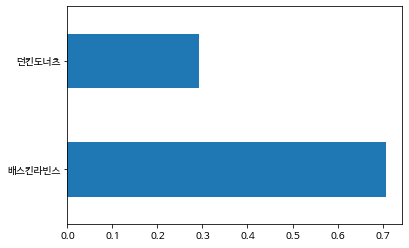

In [20]:
# normalize=True 로 빈도수의 비율을 구합니다.
df_31["브랜드명"].value_counts(normalize=True).plot.barh()

In [21]:
brand_count.index

Index(['배스킨라빈스', '던킨도너츠'], dtype='object')

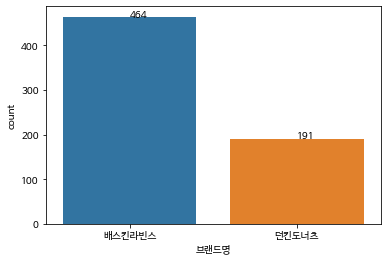

In [22]:
g = sns.countplot(data=df_31, x="브랜드명")

for i, val in enumerate(brand_count.index):
    g.text(x=i, y=brand_count[i], s=brand_count[i])

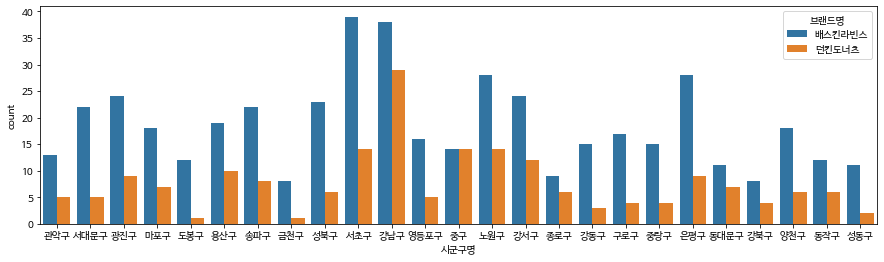

In [23]:
plt.figure(figsize=(15, 4))
g = sns.countplot(data=df_31, x="시군구명", hue="브랜드명")

In [24]:
table_city_brand = df_31.pivot_table(index="시군구명", columns="브랜드명", values="상호명", aggfunc="count")
table_city_brand.head()

브랜드명,던킨도너츠,배스킨라빈스
시군구명,,
강남구,29,38
강동구,3,15
강북구,4,8
강서구,12,24
관악구,5,13


In [25]:
for i, val in table_city_brand.iterrows():
    dunkin = val["던킨도너츠"]
    baskin = val["배스킨라빈스"]
    print(dunkin, baskin)

29 38
3 15
4 8
12 24
5 13
9 24
4 17
1 8
14 28
1 12
7 11
6 12
7 18
5 22
14 39
2 11
6 23
8 22
6 18
5 16
10 19
9 28
6 9
14 14
4 15


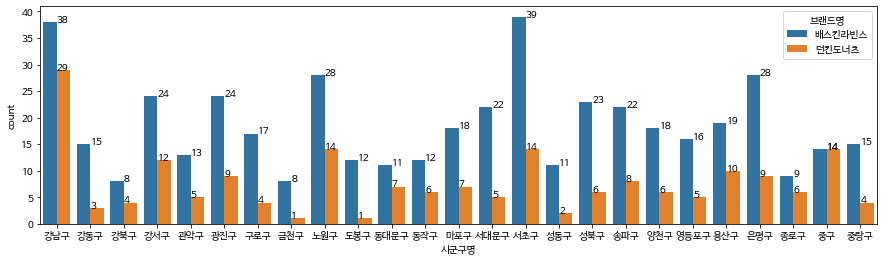

In [26]:
plt.figure(figsize=(15, 4))
g = sns.countplot(data=df_31, x="시군구명", hue="브랜드명", order=table_city_brand.index)

index_no = 0
for i, val in table_city_brand.iterrows():
    dunkin = val["던킨도너츠"]
    baskin = val["배스킨라빈스"]
    g.text(x=index_no, y=dunkin, s=dunkin)
    g.text(x=index_no, y=baskin, s=baskin)
    index_no = index_no + 1

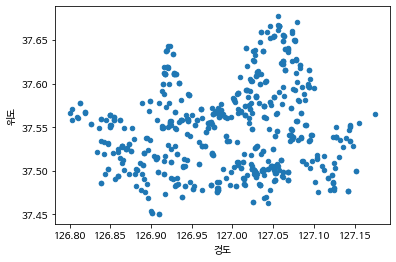

In [27]:
df_31[["위도", "경도"]].plot.scatter(x="경도", y="위도")

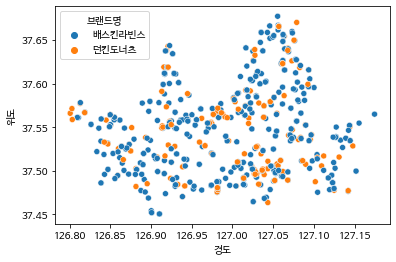

In [28]:
sns.scatterplot(data=df_31, x="경도", y="위도", hue="브랜드명")

In [29]:
# conda install -c conda-forge folium 
# 지도 시각화를 위한 라이브러리
import folium

In [30]:
# 지도의 중심을 지정하기 위해 위도와 경도의 평균을 구합니다. 
lat = df_31["위도"].mean()
long = df_31["경도"].mean()
lat, long

(37.548567678569086, 126.99419527148791)

In [31]:
m = folium.Map([lat, long])

folium.Marker(
    [37.495593, 127.039032], 
    popup='<i>던킨도너츠</i>', 
    tooltip="던킨도너츠").add_to(m)
m.save('index.html')
m

pip install git+https://github.com/python-visualization/branca.git@master

In [32]:
df_31.index

Int64Index([    76,   1167,   1819,   2164,   2305,   2342,   3007,  11060,
             13042,  13925,
            ...
            554896, 555145, 557464, 557822, 558006, 558894, 560984, 561929,
            561930, 569825],
           dtype='int64', length=655)

In [33]:
m = folium.Map([lat, long], zoom_start=12)

for i in df_31.index:
    
    sub_lat = df_31.loc[i, "위도"]
    sub_long = df_31.loc[i, "경도"]
    title = df_31.loc[i, "상호명"] + " - " + df_31.loc[i, "도로명주소"]
    
    icon_color = "blue"
    if df_31.loc[i, "브랜드명"] == "던킨도너츠":
        icon_color = "red"
    
    folium.Marker(
        [sub_lat, sub_long], 
        icon=folium.Icon(color=icon_color),
        popup=f'<i>{title}</i>', 
        tooltip=title).add_to(m)

m.save('index.html')
m

In [34]:
from folium.plugins import MarkerCluster

m = folium.Map([lat, long], zoom_start=12)
marker_cluster = MarkerCluster().add_to(m)

for i in df_31.index:
    
    sub_lat = df_31.loc[i, "위도"]
    sub_long = df_31.loc[i, "경도"]
    title = df_31.loc[i, "상호명"] + " - " + df_31.loc[i, "도로명주소"]
    
    icon_color = "blue"
    if df_31.loc[i, "브랜드명"] == "던킨도너츠":
        icon_color = "red"
    
    folium.Marker(
        [sub_lat, sub_long], 
        icon=folium.Icon(color=icon_color),
        popup=f'<i>{title}</i>', 
        tooltip=title).add_to(marker_cluster)

m.save('index.html')
m